<a href="https://colab.research.google.com/github/TFZAI/TFZAI/blob/main/CNN_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:

(X_train, y_train), (X_test,y_test) =cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [ ]:
# Scale the data
X_train = X_train / 255.0
X_test = X_test / 255.0

# Transform target variable into one-hotencoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 10)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 10)


In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
classes, counts = np.unique(y_train, return_counts=True)

In [ ]:
classes, counts = np.unique(y_test, return_counts=True)


In [ ]:
model = Sequential()

# Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
# Pooling layer
model.add(MaxPool2D(pool_size=(2, 2)))
# Dropout layers
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
# model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

METRICS = [
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        1

In [ ]:

from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
batch_size = 32
data_generator = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(X_train, y_train, batch_size)
steps_per_epoch = X_train.shape[0] // batch_size

In [ ]:
from tensorflow.keras.utils import to_categorical
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=METRICS)

In [ ]:
r = model.fit(train_generator, 
              epochs=10,
              steps_per_epoch=steps_per_epoch,
              validation_data=(X_test, y_test), 
#               callbacks=[early_stop],
#               batch_size=batch_size,
             )

Epoch 1/10
1562/1562 [==============================] - 470s 301ms/step - loss: 1.0785 - accuracy: 0.6225 - precision: 0.7634 - recall: 0.4822 - val_loss: 0.9917 - val_accuracy: 0.6590 - val_precision: 0.7643 - val_recall: 0.5635
Epoch 2/10
1562/1562 [==============================] - 471s 302ms/step - loss: 0.9668 - accuracy: 0.6652 - precision: 0.7880 - recall: 0.5470 - val_loss: 0.8839 - val_accuracy: 0.6958 - val_precision: 0.7913 - val_recall: 0.6092
Epoch 3/10
1562/1562 [==============================] - 473s 303ms/step - loss: 0.8846 - accuracy: 0.6955 - precision: 0.8058 - recall: 0.5911 - val_loss: 0.9196 - val_accuracy: 0.6882 - val_precision: 0.7859 - val_recall: 0.5965
Epoch 4/10
1562/1562 [==============================] - 474s 303ms/step - loss: 0.8177 - accuracy: 0.7224 - precision: 0.8227 - recall: 0.6281 - val_loss: 0.6922 - val_accuracy: 0.7694 - val_precision: 0.8415 - val_recall: 0.6987
Epoch 5/10
1562/1562 [==============================] - 476s 305ms/step - loss: 

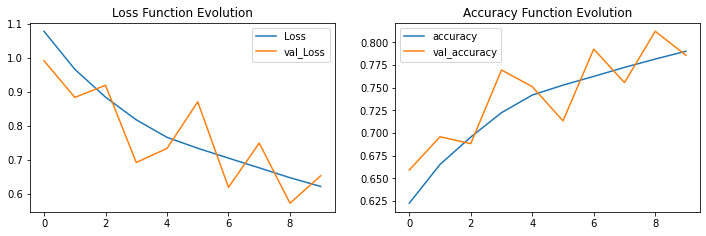

In [ ]:
plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='val_Loss')
plt.title('Loss Function Evolution')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy Function Evolution')
plt.legend()
